In [1]:
import warnings
from os import listdir
from os.path import basename, splitext
from itertools import permutations
from multiprocessing import Pool

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, Timedelta,  read_hdf 
from matplotlib import pyplot as plt
from matplotlib import cm 

In [2]:
# Settings
warnings.filterwarnings("ignore")
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (20, 8)  # Размер картинок

%matplotlib inline
# %matplotlib widget

In [3]:
def downsample(dataframe):
    return dataframe.resample('60Min').last()

In [4]:
def to_dataframe(hdf):
    return DataFrame(read_hdf(f"data/hdf/{hdf}"))

In [5]:
def tickername(file):
    return splitext(basename(file))[0]

In [6]:
def load(hdf):
    # split ticker to base-quoted
    ticker = tickername(hdf)
    dataframe = to_dataframe(hdf)
    dataframe.columns = [ticker]
    return downsample(dataframe)

In [7]:
# Check data
ethbtc = load('ethbtc.hdf')
ethbtc.head(5)

,ethbtc
Date_Time,
2017-07-14 07:00:00,0.086347
2017-07-14 08:00:00,0.085399
2017-07-14 09:00:00,0.087200
2017-07-14 10:00:00,0.088591
2017-07-14 11:00:00,0.088888


In [8]:
ethbtc.count()

ethbtc    9368
dtype: int64

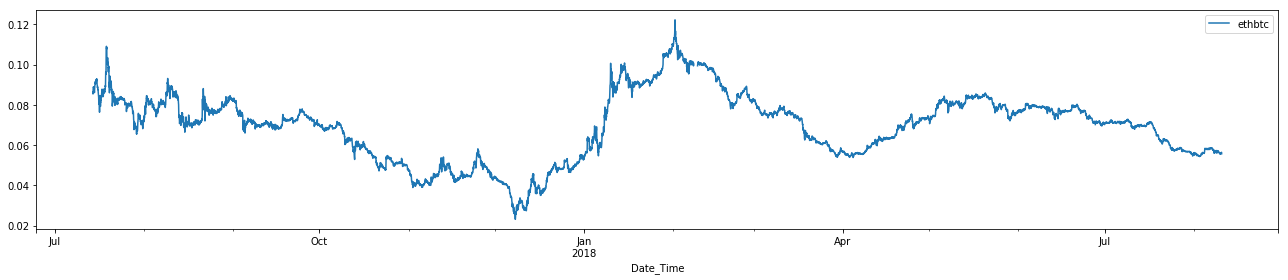

In [9]:
ethbtc.plot(figsize=(18,4))

In [10]:
def get_hdf_files():
    return listdir('data/hdf/')

In [11]:
hdf_files = get_hdf_files()
hdf_files.remove('ethbtc.hdf')
hdf_files

['xrpbtc.hdf',
 'qtumbnb.hdf',
 'omgbtc.hdf',
 'xrpeth.hdf',
 'zeceth.hdf',
 'zrxbtc.hdf',
 'qtumeth.hdf',
 'etcbtc.hdf',
 'xrpbnb.hdf',
 'qtumbtc.hdf',
 'neousdt.hdf',
 'xlmeth.hdf',
 'etcbnb.hdf',
 'zecbtc.hdf',
 'etceth.hdf',
 'omgeth.hdf',
 'xrpusdt.hdf',
 'ethusdt.hdf',
 'qtumusdt.hdf',
 'neobnb.hdf',
 'xlmusdt.hdf',
 'bnbusdt.hdf',
 'dasheth.hdf',
 'ltceth.hdf',
 'bnbbtc.hdf',
 'btcusdt.hdf',
 'adausdt.hdf',
 'bnbeth.hdf',
 'neobtc.hdf',
 'adabnb.hdf',
 'xmrbtc.hdf',
 'neoeth.hdf',
 'adaeth.hdf',
 'xmreth.hdf',
 'ltcusdt.hdf',
 'xlmbnb.hdf',
 'adabtc.hdf',
 'ltcbnb.hdf',
 'etcusdt.hdf',
 'zrxeth.hdf',
 'xlmbtc.hdf',
 'ltcbtc.hdf',
 'dashbtc.hdf']

In [12]:
def add(base, tickers): 
    for ticker in tickers:
        base = base.join(ticker)
        base.dropna(inplace=True)
    return base 

In [13]:
tickers = Pool().map(load, hdf_files)
result_dataframe = add(ethbtc, tickers)
result_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,xmreth,ltcusdt,xlmbnb,adabtc,ltcbnb,etcusdt,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,0.077528,0.000086,0.77842,0.001427,0.001110,0.38827,0.000150,0.022680,0.002262,0.03823,...,0.25562,106.56,0.01615,0.000026,6.91,15.5300,0.001937,0.000036,0.015566,0.038798
2018-06-12 06:00:00,0.077175,0.000086,0.77324,0.001413,0.001110,0.38968,0.000149,0.022889,0.002242,0.03720,...,0.25553,105.00,0.01588,0.000026,6.75,15.2300,0.001940,0.000036,0.015446,0.039055
2018-06-12 07:00:00,0.077697,0.000086,0.76153,0.001405,0.001104,0.38883,0.000150,0.022943,0.002296,0.03678,...,0.25376,106.35,0.01564,0.000026,6.69,15.6002,0.001932,0.000036,0.015618,0.038967


In [14]:
def ration(df):
    for ticker in df.columns:
        df[ticker] = StandardScaler().fit_transform(
            df[ticker].values.reshape(-1, 1))
    return df 

In [15]:
# Cut 50% of matrix and drop labels on stages
ration_dataframe = ration(result_dataframe)
ration_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,xmreth,ltcusdt,xlmbnb,adabtc,ltcbnb,etcusdt,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,1.315797,1.804590,2.380457,1.534198,2.173736,-0.407647,0.773333,2.475940,-0.481585,1.754833,...,-1.203284,2.763782,-0.283944,1.930592,1.785112,-0.515348,-0.377464,0.739400,2.112015,0.971302
2018-06-12 06:00:00,1.270867,1.749543,2.312375,1.472052,2.173736,-0.372779,0.727885,2.587676,-0.570369,1.351413,...,-1.207897,2.580296,-0.356667,1.787722,1.472555,-0.754700,-0.370322,0.712635,2.036895,1.032930
2018-06-12 07:00:00,1.337308,1.767200,2.158466,1.436539,2.026716,-0.393799,0.797572,2.616545,-0.330653,1.186912,...,-1.298638,2.739082,-0.421310,1.823440,1.355346,-0.459340,-0.391801,0.719326,2.144567,1.011828


In [16]:
def weigh_quoted(ticker):
    weigh = 1000
    for idx, quoted in enumerate(['usdt', 'btc', 'eth', 'bnb']):
        if ticker.find(quoted) in [-1, 0]:
            continue
        return idx * weigh

In [17]:
def weigh_base(ticker):
    # TODO: Sort by coinmarcetcup top
    bases = [
        'btc', 'xrp', 'eth', 'xlm', 'ltc', 'usdt', 'ada', 
        'xmr', 'dash', 'bnb', 'neo', 'etc', 'zec', 'mkr', 
        'doge', 'zrx', 'omg', 'dcr', 'qtum']
    for idx, base in enumerate(bases):
        if ticker.find(base) != 0:
            continue
        return idx

In [18]:
def weigh_ticker(ticker):
    return weigh_quoted(ticker) + weigh_base(ticker)

In [19]:
def sort_tickers(df):
    tickers = list(df.columns)
    sorted_tickers = sorted(tickers, key=weigh_ticker)
    return df[sorted_tickers]

In [20]:
ration_dataframe = sort_tickers(ration_dataframe)
ration_dataframe.head()

,btcusdt,xrpusdt,ethusdt,xlmusdt,ltcusdt,adausdt,bnbusdt,neousdt,etcusdt,qtumusdt,...,zrxeth,omgeth,qtumeth,xrpbnb,xlmbnb,ltcbnb,adabnb,neobnb,etcbnb,qtumbnb
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,-0.019963,2.718039,1.992284,0.349602,2.763782,1.662935,1.228137,2.555260,-0.515348,2.656820,...,-0.377464,1.503589,2.475940,1.754833,-0.283944,1.785112,0.498880,1.641618,-1.184564,2.380457
2018-06-12 06:00:00,-0.081576,2.526439,1.805646,0.248277,2.580296,1.455246,1.306203,2.380852,-0.754700,2.615451,...,-0.370322,1.466542,2.587676,1.351413,-0.356667,1.472555,0.307013,1.435892,-1.248065,2.312375
2018-06-12 07:00:00,-0.079770,2.564452,1.922395,0.268301,2.739082,1.509813,1.572929,2.397930,-0.459340,2.721015,...,-0.391801,1.342038,2.616545,1.186912,-0.421310,1.355346,0.172707,1.202532,-1.225615,2.158466
2018-06-12 08:00:00,-0.046360,2.692111,1.974075,0.303765,2.795539,1.611152,1.455595,2.361640,-0.020527,2.885067,...,-0.371623,1.352363,2.727746,1.461080,-0.378215,1.511624,0.332596,1.285436,-0.956858,2.430402
2018-06-12 09:00:00,-0.043997,2.667722,1.987732,0.306177,2.793187,1.535983,1.588840,2.412233,-0.393039,2.742413,...,-0.349586,1.468971,2.562014,1.222162,-0.448245,1.374881,0.217476,1.181038,-1.199317,2.183833


In [21]:
corr = ration_dataframe.corr()
corr.head()

,btcusdt,xrpusdt,ethusdt,xlmusdt,ltcusdt,adausdt,bnbusdt,neousdt,etcusdt,qtumusdt,...,zrxeth,omgeth,qtumeth,xrpbnb,xlmbnb,ltcbnb,adabnb,neobnb,etcbnb,qtumbnb
btcusdt,1.000000,-0.111304,0.084317,0.947150,0.096739,0.552555,-0.251595,-0.004631,0.370594,-0.244190,...,0.738157,-0.448561,-0.454580,0.175701,0.887675,0.410161,0.638003,0.174041,0.370885,-0.124924
xrpusdt,-0.111304,1.000000,0.916427,-0.004257,0.952523,0.604403,0.703874,0.876350,-0.203442,0.949448,...,-0.464280,0.829192,0.842619,0.451740,-0.275575,0.389550,0.077685,0.444162,-0.562312,0.746826
ethusdt,0.084317,0.916427,1.000000,0.174181,0.939979,0.751219,0.585662,0.913881,0.019907,0.891642,...,-0.293648,0.732060,0.693566,0.499967,-0.072933,0.515780,0.286127,0.572613,-0.350058,0.765639
xlmusdt,0.947150,-0.004257,0.174181,1.000000,0.215557,0.687320,-0.194847,0.073969,0.247876,-0.129062,...,0.725874,-0.339084,-0.342343,0.247095,0.916824,0.493099,0.722983,0.219205,0.274442,-0.016479
ltcusdt,0.096739,0.952523,0.939979,0.215557,1.000000,0.762047,0.645304,0.867875,-0.174721,0.917265,...,-0.293698,0.738747,0.763685,0.462364,-0.063404,0.513415,0.253489,0.473944,-0.498337,0.742754


In [22]:
def plot_corr(corr, title='', colormap='RdYlGn', size=10, filename=None):
    count = len(corr.columns)
    ticks = range(count)
    labels = list(corr.columns)
    
    cmap = cm.get_cmap(colormap, 256)
    fig, ax = plt.subplots(figsize=(size, size))
    fig.suptitle(title, fontsize=20)

#     if not filename:
#         ax.matshow(corr)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(ticks, labels, rotation='vertical')
    plt.yticks(ticks, labels)
    
    colorbar = fig.colorbar(cax, ticks=[1, 0, -1])
    if filename:
        plt.savefig(f"data/plots/{filename}")

Colormaps reference
https://matplotlib.org/examples/color/colormaps_reference.html 

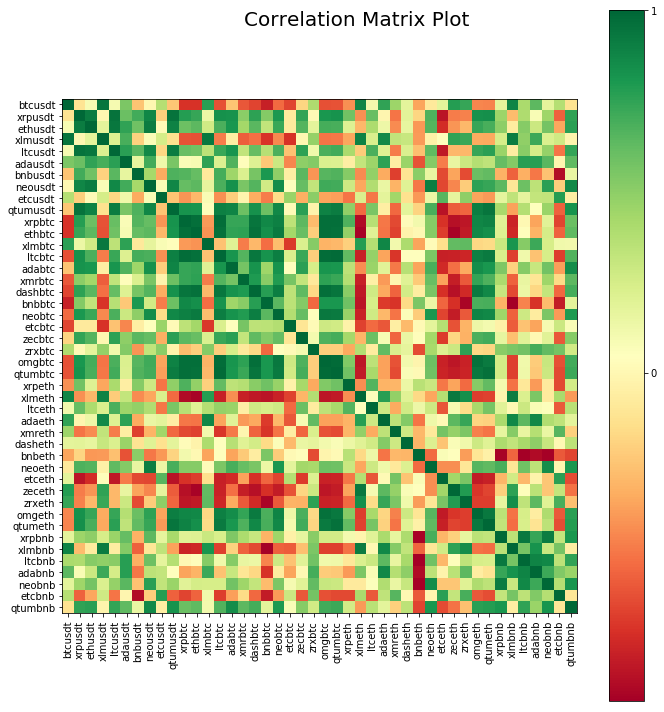

In [23]:
# plot_corr(corr, colormap='seismic') # - красно-синяя
# plot_corr(corr, colormap='Purples') # - однотонная
name = 'Сorrelation Matrix Plot'
plot_corr(corr, title=name, filename=name) # - зелено-желто-красная default

In [24]:
# rolling_corr = ration_dataframe.rolling('7D').corr()
# rolling_corr содержит датафрейм с MultiIndex('Date_Time', [*tickernames])
# plot_corr(rolling_corr.loc['2018-06-19 05:00:00'], title='Moving window size = 12 days\n2018-06-19 05:00:00') # + неделя

In [25]:
def get_edges(dataframe):
    indexes = dataframe.index
    start_date = indexes[0]
    end_date = indexes[-1]
    return start_date, end_date

In [26]:
edges = get_edges(ration_dataframe)
edges

(Timestamp('2018-06-12 05:00:00'), Timestamp('2018-08-10 15:00:00'))

In [27]:
edges[1] - edges[0] 

Timedelta('59 days 10:00:00')

In [28]:
def create_rolling_dataframes(dataframe, rolling_period, start_date, end_date):
    rolling_dataframes = []
    counter = start_date + rolling_period
    
    while counter <= end_date:
        timedelta = counter - start_date
        window = f"{timedelta.days}D"

        rolling_dataframe = ration_dataframe.rolling(window)
        rolling_dataframes.append((window, rolling_dataframe))
        counter += rolling_period

    return rolling_dataframes

In [29]:
rolling_dataframes = create_rolling_dataframes(ration_dataframe, Timedelta('7 days'), *edges)
rolling_dataframes[0]

('7D',
 Rolling [window=604800000000000,min_periods=1,center=False,win_type=freq,axis=0])

In [30]:
def corr_rolling(dataframe):
    return dataframe[0], dataframe[1].corr()

In [31]:
rolling_corrs = Pool().map(corr_rolling, rolling_dataframes)

In [32]:
len(rolling_corrs)

8

In [33]:
import os

def plot_rolling_corr(rolling_corr_day, title, window_size, filename):
    if not os.path.exists(f"data/plots/{window_size}"):
        os.makedirs(f"data/plots/{window_size}")
    plot_corr(rolling_corr_day, title=title, filename=filename)

In [34]:
def create_rolling_plots(rolling):
    window_size, rolling_corr = rolling
    datetimes = rolling_corr.index.levels[0]
    dates = set(map(lambda x: x.date(), datetimes))
    for date in dates:
        title = f"[{window_size}] {date}"
        filename = f"{window_size}/{date}"
        plot_rolling_corr(rolling_corr.loc[f"{date} 12:00:00"], title, window_size, filename)

KeyboardInterrupt: 

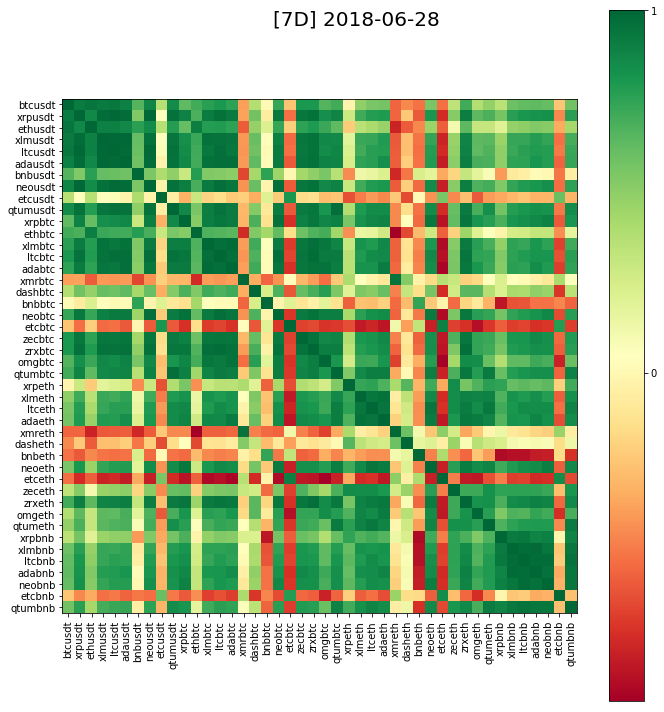

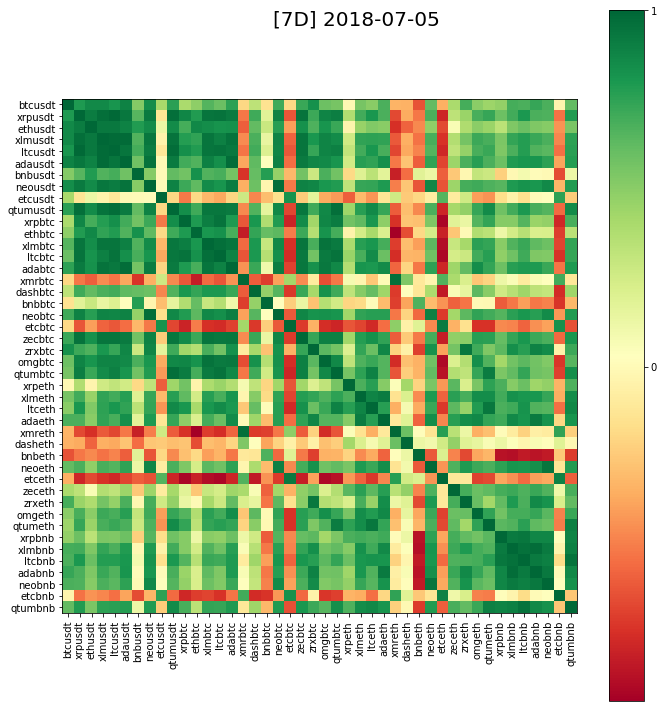

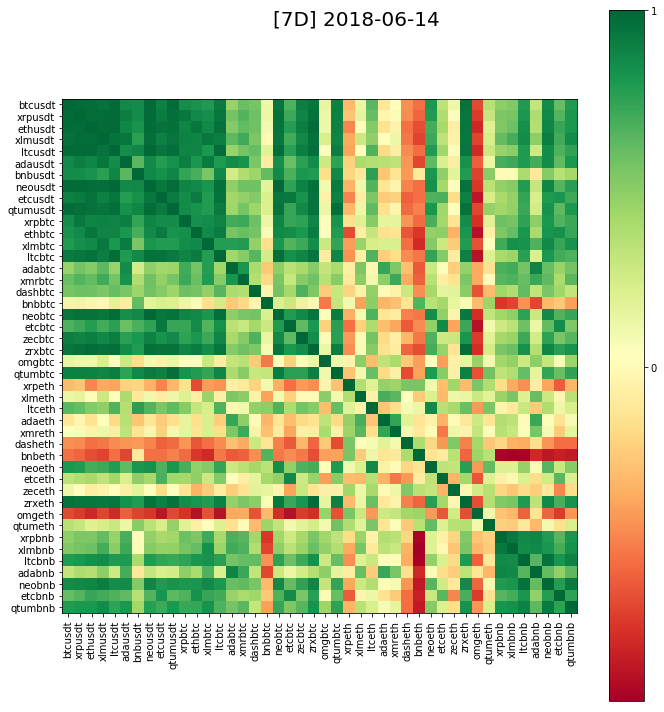

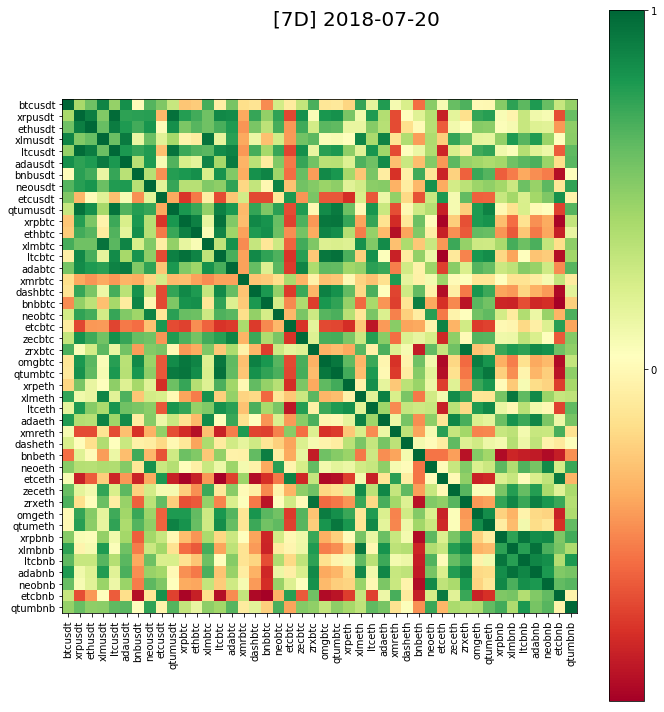

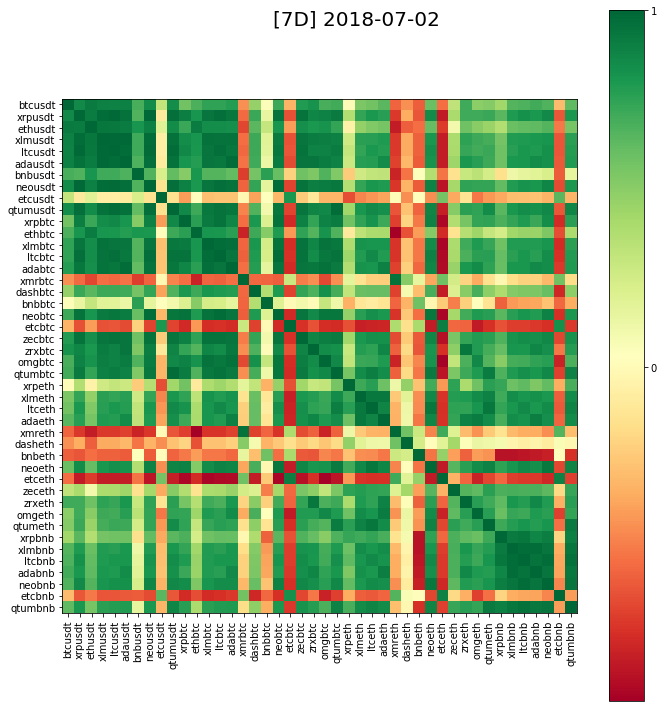

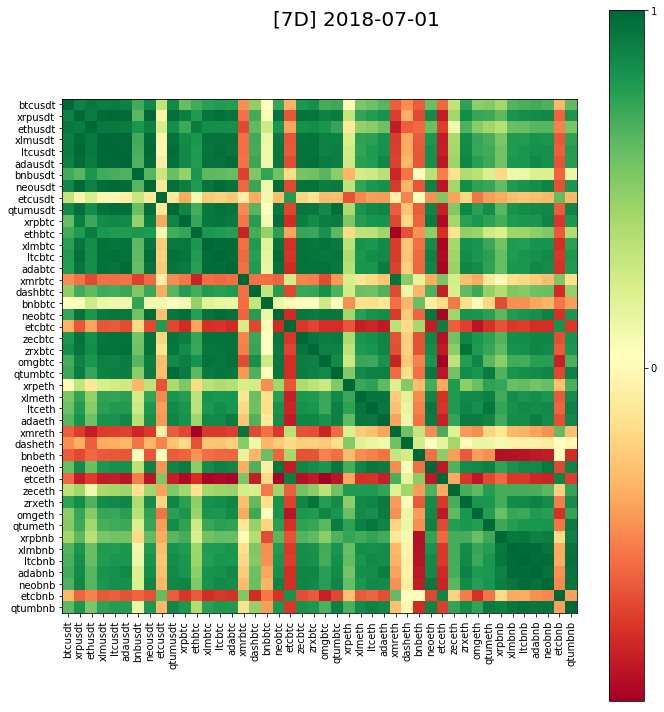

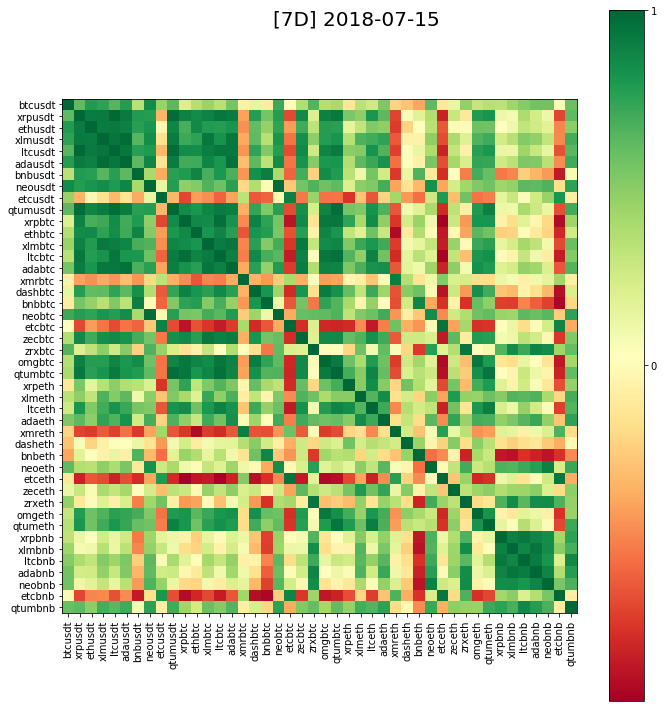

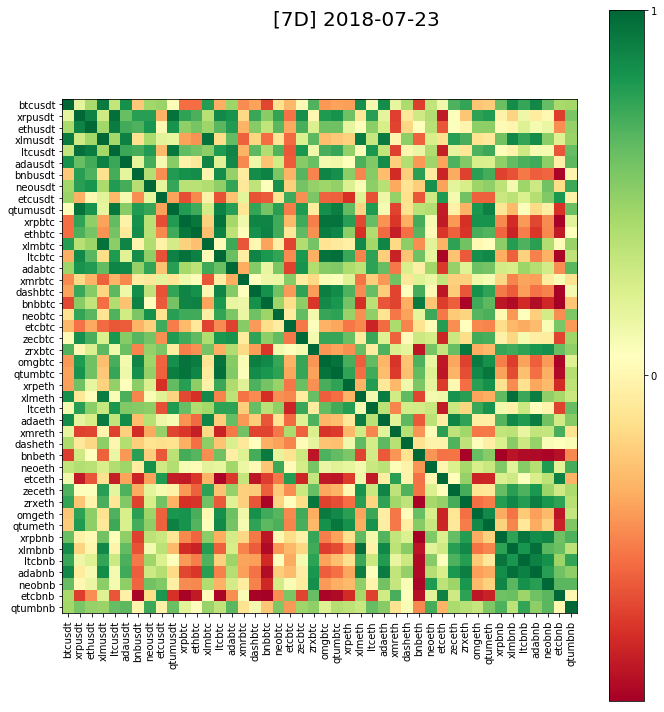

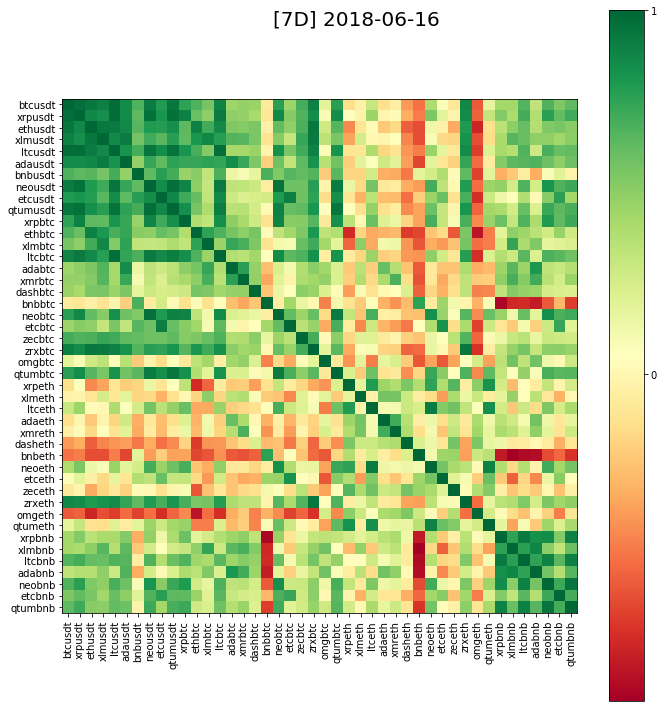

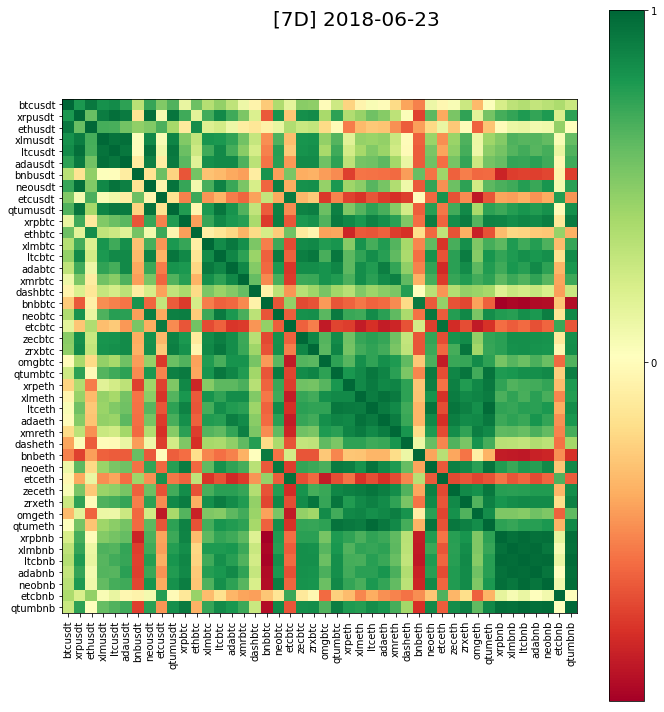

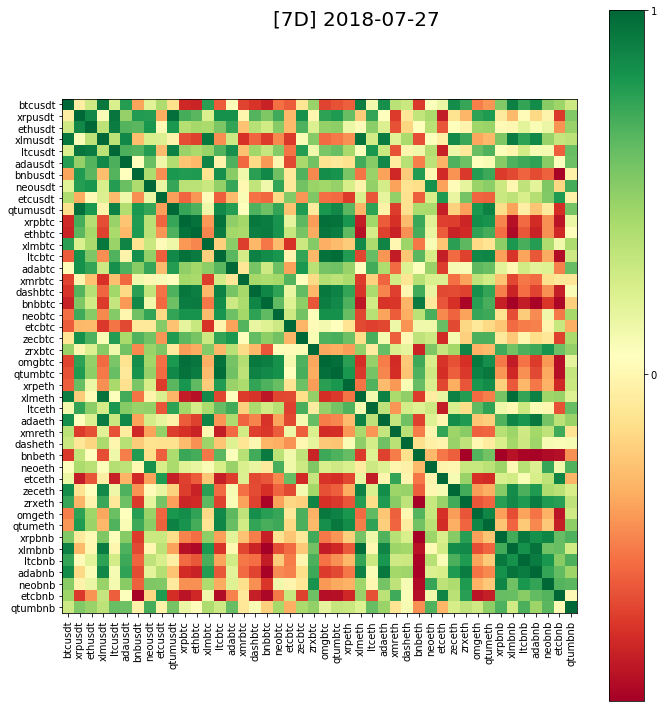

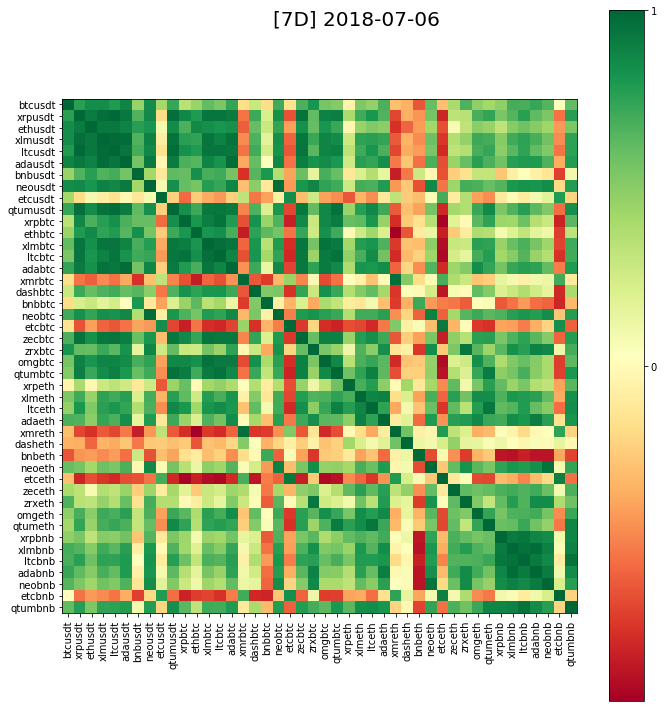

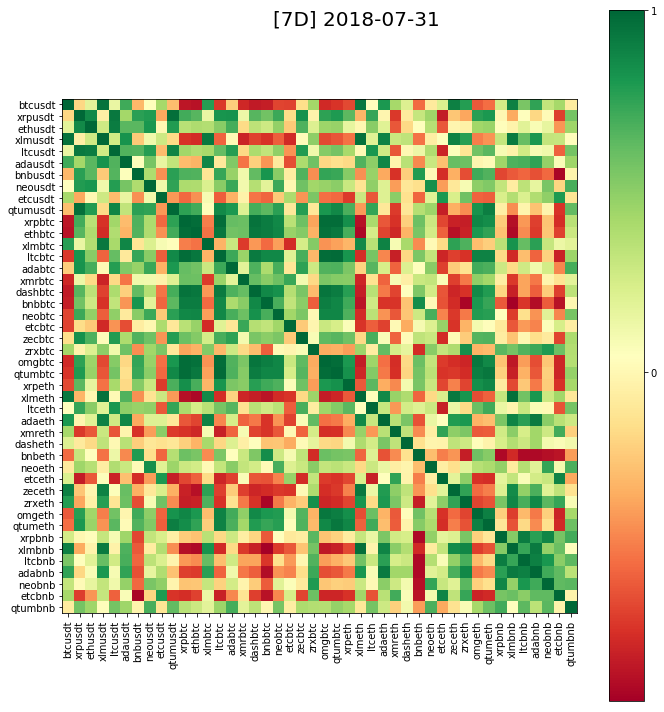

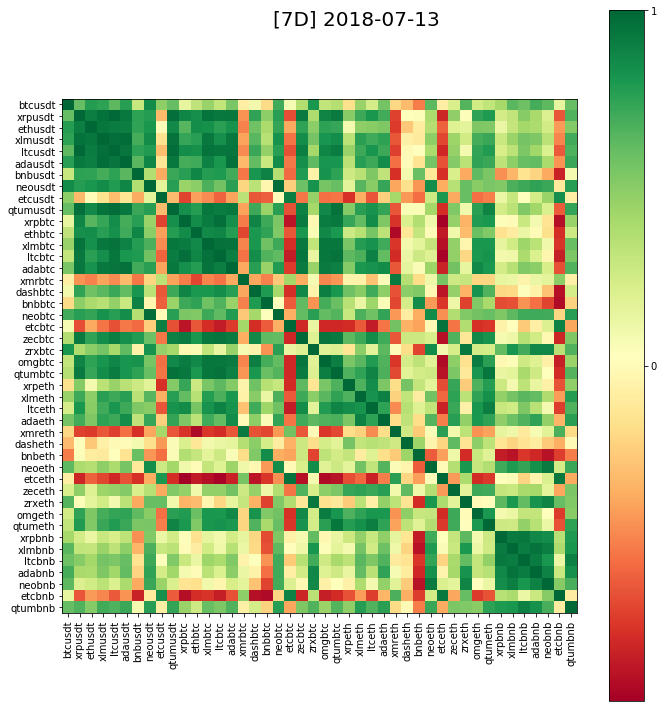

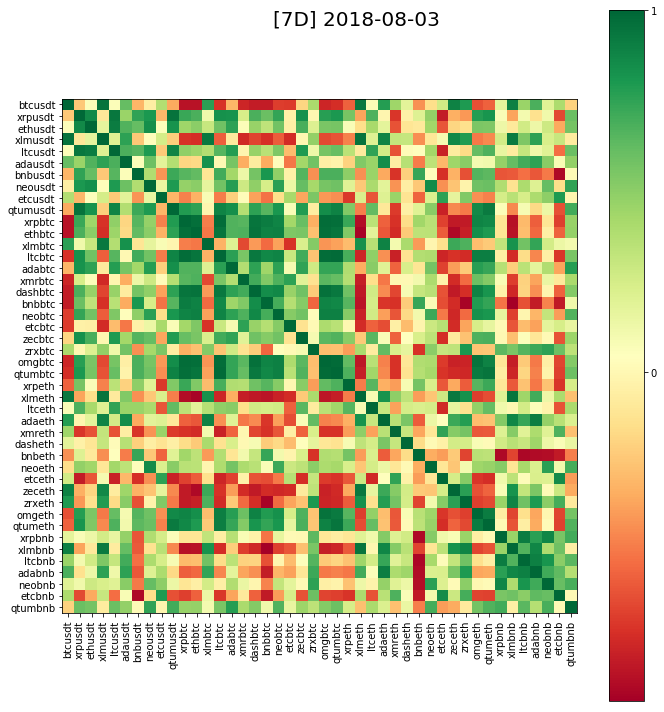

In [35]:
# Pool(processes=4).
tuple(map(create_rolling_plots, rolling_corrs))

In [35]:
btcusdt = load('btcusdt.hdf')
btcusdt.head(5)

,btcusdt
Date_Time,
2017-08-17 07:00:00,4308.83
2017-08-17 08:00:00,4315.32
2017-08-17 09:00:00,4324.35
2017-08-17 10:00:00,4349.99
2017-08-17 11:00:00,4360.69


In [36]:
def plot_main_corr(ax, corr, colormap='RdYlGn', filename=None):    
    ticks = range(len(corr.columns))
    labels = list(corr.columns)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels, rotation='vertical')
    ax.set_yticklabels(labels)
    cmap = cm.get_cmap(colormap, 256)
    im = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    return im
#     ax.set_axis_off()

In [37]:
def btcusdt_plotter(ax, btcusdt, param_dict=None):
    if param_dict is None:
        param_dict = {}
    out = ax.plot(btcusdt, label='BTC/USDT', **param_dict)
    plt.legend()
    return out

In [71]:
def calc_mean(corr):
    return round((corr.mean().mean()), 4)

In [38]:
window_7D, rolling_corr_7D = rolling_corrs[0]

In [81]:
datetimes_7D = rolling_corr_7D.index.levels[0]
dates_7D = sorted(list(set(map(lambda x: x.date(), datetimes_7D))))
datetimes_7D

DatetimeIndex(['2018-06-12 05:00:00', '2018-06-12 06:00:00',
               '2018-06-12 07:00:00', '2018-06-12 08:00:00',
               '2018-06-12 09:00:00', '2018-06-12 10:00:00',
               '2018-06-12 11:00:00', '2018-06-12 12:00:00',
               '2018-06-12 13:00:00', '2018-06-12 14:00:00',
               ...
               '2018-08-10 06:00:00', '2018-08-10 07:00:00',
               '2018-08-10 08:00:00', '2018-08-10 09:00:00',
               '2018-08-10 10:00:00', '2018-08-10 11:00:00',
               '2018-08-10 12:00:00', '2018-08-10 13:00:00',
               '2018-08-10 14:00:00', '2018-08-10 15:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=1409, freq=None)

In [80]:
dates_7D

[datetime.date(2018, 6, 12),
 datetime.date(2018, 6, 13),
 datetime.date(2018, 6, 14),
 datetime.date(2018, 6, 15),
 datetime.date(2018, 6, 16),
 datetime.date(2018, 6, 17),
 datetime.date(2018, 6, 18),
 datetime.date(2018, 6, 19),
 datetime.date(2018, 6, 20),
 datetime.date(2018, 6, 21),
 datetime.date(2018, 6, 22),
 datetime.date(2018, 6, 23),
 datetime.date(2018, 6, 24),
 datetime.date(2018, 6, 25),
 datetime.date(2018, 6, 26),
 datetime.date(2018, 6, 27),
 datetime.date(2018, 6, 28),
 datetime.date(2018, 6, 29),
 datetime.date(2018, 6, 30),
 datetime.date(2018, 7, 1),
 datetime.date(2018, 7, 2),
 datetime.date(2018, 7, 3),
 datetime.date(2018, 7, 4),
 datetime.date(2018, 7, 5),
 datetime.date(2018, 7, 6),
 datetime.date(2018, 7, 7),
 datetime.date(2018, 7, 8),
 datetime.date(2018, 7, 9),
 datetime.date(2018, 7, 10),
 datetime.date(2018, 7, 11),
 datetime.date(2018, 7, 12),
 datetime.date(2018, 7, 13),
 datetime.date(2018, 7, 14),
 datetime.date(2018, 7, 15),
 datetime.date(2018, 7,

In [72]:
corr_7D = rolling_corr_7D.loc[f"{dates_7D[0]} 12:00:00"]
mean_abs_corr_7D = abs(calc_mean(corr))
# corr_7D
mean_abs_corr_7D

0.1797

In [ ]:
corr_7D = rolling_corr_7D.loc[f"{dates_7D[0]} 12:00:00"]

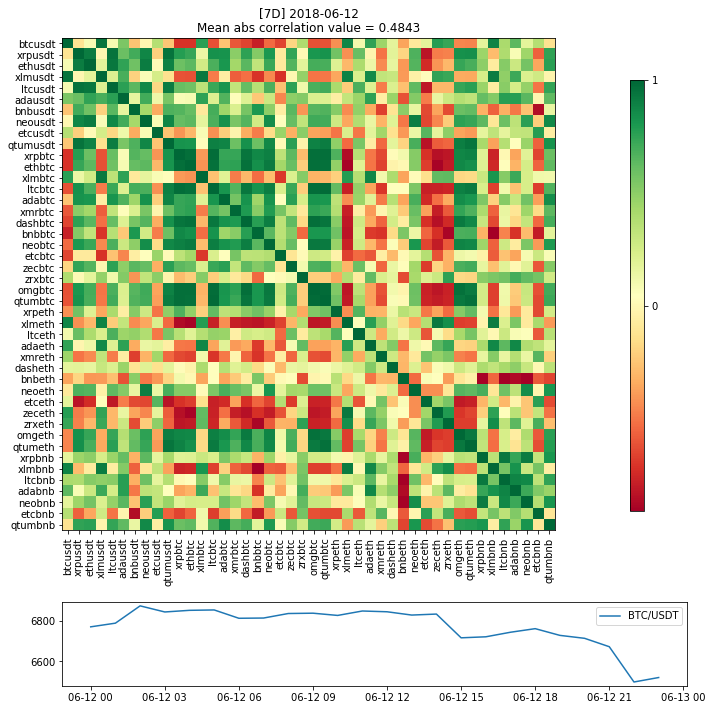

In [57]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
gs = fig.add_gridspec(5, 5)

ax1 = fig.add_subplot(gs[:4, :-1])
ax1.set_title(f"[{window_7D}] {dates_7D[0]}\nMean abs correlation value = {mean_abs_corr_7D}")
im = plot_main_corr(ax1, corr)

ax2 = fig.add_subplot(gs[4, :])
btcusdt_plotter(ax2, btcusdt.loc[btcusdt.index.date == dates_7D[0]])

ax3 = fig.add_subplot(gs[:4, -1])
ax3.set_axis_off()
fig.colorbar(im, ax=ax3, ticks=[1, 0, -1])
plt.tight_layout()

In [45]:
mean_abs_corr = round(corr.abs().mean().mean(), 4)
mean_abs_corr

0.4843

In [46]:
def plot_rolling_all(ax, corr, colormap='RdYlGn'):    
    cmap = cm.get_cmap(colormap, 256)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    ax.set_axis_off()
    out = ax.plot()
    return out

In [47]:
dates_7D = sorted(list(dates_7D))

In [48]:
corr_cells = len(dates_7D)
corr_cells

60

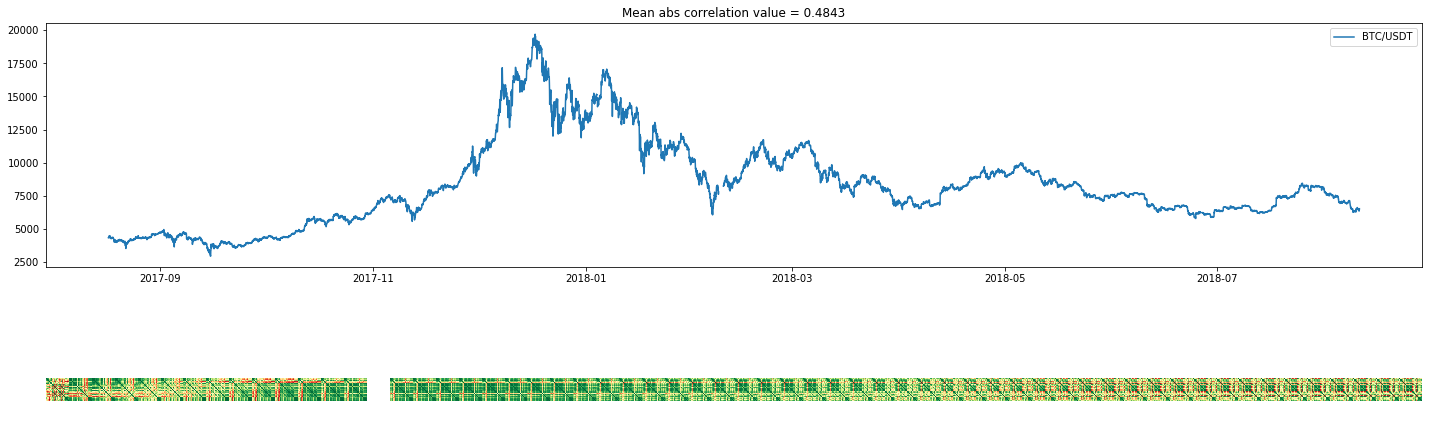

In [63]:
fig = plt.figure(constrained_layout=True, figsize=(25, 5)) # 20 12/8
gs = fig.add_gridspec(2, corr_cells)
gs.update(wspace=0, hspace=0)

for idx, date in enumerate(dates_7D):
    date_ax = fig.add_subplot(gs[1, idx])
#     date_ax.set_aspect('equal')
    plot_rolling_all(date_ax, rolling_corr_7D.loc[f"{date} 12:00:00"])

ax2 = fig.add_subplot(gs[:1, :])
ax2.set_title(f"Mean abs correlation value = {mean_abs_corr}")
btcusdt_plotter(ax2, btcusdt)
plt.tight_layout()

In [82]:
start_date, end_date = dates_7D[0], dates_7D[-1]
start_date, end_date

(datetime.date(2018, 6, 12), datetime.date(2018, 8, 10))

In [86]:
btcusdt = btcusdt.loc[start_date: end_date]
btcusdt

,btcusdt
Date_Time,
2018-06-12 00:00:00,6769.01
2018-06-12 01:00:00,6786.99
2018-06-12 02:00:00,6872.00
2018-06-12 03:00:00,6842.00
2018-06-12 04:00:00,6850.05
2018-06-12 05:00:00,6851.94
2018-06-12 06:00:00,6811.00
2018-06-12 07:00:00,6812.20
2018-06-12 08:00:00,6834.40


In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(25, 5)) # 20 12/8
gs = fig.add_gridspec(2, corr_cells)
gs.update(wspace=0, hspace=0)

for idx, date in enumerate(dates_7D):
    date_ax = fig.add_subplot(gs[1, idx])
#     date_ax.set_aspect('equal')
    plot_rolling_all(date_ax, rolling_corr_7D.loc[f"{date} 12:00:00"])

ax2 = fig.add_subplot(gs[:1, :])
ax2.set_title(f"Mean abs correlation value = {mean_abs_corr}")
btcusdt_plotter(ax2, btcusdt)
plt.tight_layout()

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
gs = fig.add_gridspec(5, 5)

ax1 = fig.add_subplot(gs[:4, :-1])
ax1.set_title(f"[{window_7D}] {dates_7D[0]}\nMean abs correlation value = {mean_abs_corr_7D}")
im = plot_main_corr(ax1, corr)

ax2 = fig.add_subplot(gs[4, :])
btcusdt_plotter(ax2, btcusdt.loc[btcusdt.index.date == dates_7D[0]])

ax3 = fig.add_subplot(gs[:4, -1])
ax3.set_axis_off()
fig.colorbar(im, ax=ax3, ticks=[1, 0, -1])
plt.tight_layout()